In [1]:
from torchvision import datasets
import numpy as np

class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        if name=='mnist_5':
            data=np.load('./mnist_5.npy')
            X=data[:,:-1]
            Y_true=data[:,-1]
            return X,Y_true
        
        if name=='mnist_10':
            data=np.load('./mnist_10.npy')
            X=data[:,:-1]
            Y_true=data[:,-1]
            return X,Y_true
        
        if name=='mnist_20':
            data=np.load('./mnist_20.npy')
            X=data[:,:-1]
            Y_true=data[:,-1]
            return X,Y_true
        
        if name=='mnist_30':
            data=np.load('./mnist_30.npy')
            X=data[:,:-1]
            Y_true=data[:,-1]
            return X,Y_true
        
        if name=='mnist_784':
            dataset2 = datasets.MNIST('../data', train=False, download=True)
            N=dataset2.test_data.shape[0]
            X=dataset2.test_data.numpy().reshape(N,784)/255
            Y_true=dataset2.test_labels.numpy()
            return X,Y_true
        
        if name=='fmnist_5':
            data=np.load('./fmnist_5.npy')
            X=data[:,:-1]
            Y_true=data[:,-1]
            return X,Y_true
        
        if name=='fmnist_10':
            data=np.load('./fmnist_10.npy')
            X=data[:,:-1]
            Y_true=data[:,-1]
            return X,Y_true
        
        if name=='fmnist_20':
            data=np.load('./fmnist_20.npy')
            X=data[:,:-1]
            Y_true=data[:,-1]
            return X,Y_true
        
        if name=='fmnist_30':
            data=np.load('./fmnist_30.npy')
            X=data[:,:-1]
            Y_true=data[:,-1]
            return X,Y_true
        
        if name=='fmnist_784':
            dataset2 = datasets.FashionMNIST('../data', train=False, download=True)
            N=dataset2.test_data.shape[0]
            X=dataset2.test_data.numpy().reshape(N,784)/255
            Y_true=dataset2.test_labels.numpy()
            return X,Y_true

In [2]:
import sys;sys.path.append('../utils/')
from api import DGSFC
import hdbscan
from sklearn.cluster import KMeans
from QuickshiftPP import *
from measures import measures_calculator, matchY

import umap
import matplotlib.pyplot as plt
import os
import os.path as osp

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/umap/__init__.py:9: UserWarning:

Tensorflow not installed; ParametricUMAP will be unavailable



In [3]:
if osp.exists('umap_results') is False:
    os.mkdir('umap_results')

In [4]:
param_dict = {
    'GDT':{
        'mnist_5':    {'K_d': 55, 'K_s': 27, 'alpha': 0.2},
        'mnist_10':   {'K_d': 45, 'K_s': 37, 'alpha': 0.2},
        'mnist_20':   {'K_d': 60, 'K_s': 30, 'alpha': 0.2},
        'mnist_30':   {'K_d': 45, 'K_s': 22, 'alpha': 0.2},
        'fmnist_5':   {'K_d': 50, 'K_s': 30, 'alpha': 0.2},
        'fmnist_10':  {'K_d': 25, 'K_s': 12, 'alpha': 0.2},
        'fmnist_20':  {'K_d': 60, 'K_s': 40, 'alpha': 0.3},
        'fmnist_30':  {'K_d': 75, 'K_s': 50, 'alpha': 0.4},
    },
    'HDBSCAN':{
        'mnist_5':    {'min_cluster_size': 20, 'min_samples': 10, 'cluster_selection_epsilon': 0.5},
        'mnist_10':   {'min_cluster_size': 20, 'min_samples': 1, 'cluster_selection_epsilon': 0.1},
        'mnist_20':   {'min_cluster_size': 10, 'min_samples': 2, 'cluster_selection_epsilon': 2},
        'mnist_30':   {'min_cluster_size': 15, 'min_samples': 1, 'cluster_selection_epsilon': 2},
        'fmnist_5':   {'min_cluster_size': 20, 'min_samples': 5, 'cluster_selection_epsilon': 0.1},
        'fmnist_10':  {'min_cluster_size': 20, 'min_samples': 1, 'cluster_selection_epsilon': 0.1},
        'fmnist_20':  {'min_cluster_size': 45, 'min_samples': 1, 'cluster_selection_epsilon': 0.1},
        'fmnist_30':  {'min_cluster_size': 50, 'min_samples': 1, 'cluster_selection_epsilon': 0.1},
    },
    'QuickshiftPP':{
        'mnist_5':    {'k': 60, 'beta': 0.4},
        'mnist_10':   {'k': 50, 'beta': 0.5},
        'mnist_20':   {'k': 50, 'beta': 0.5},
        'mnist_30':   {'k': 50, 'beta': 0.5},
        'fmnist_5':   {'k': 60, 'beta': 0.05},
        'fmnist_10':  {'k': 50, 'beta': 0.1},
        'fmnist_20':  {'k': 15, 'beta': 0.7},
        'fmnist_30':  {'k': 50, 'beta': 0.6},
    }
}

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

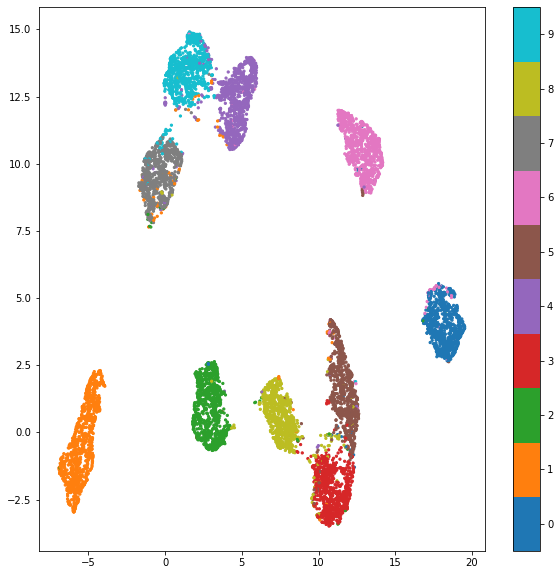

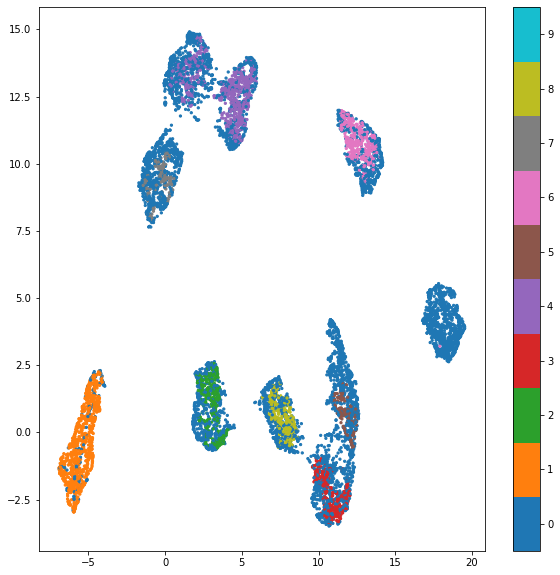

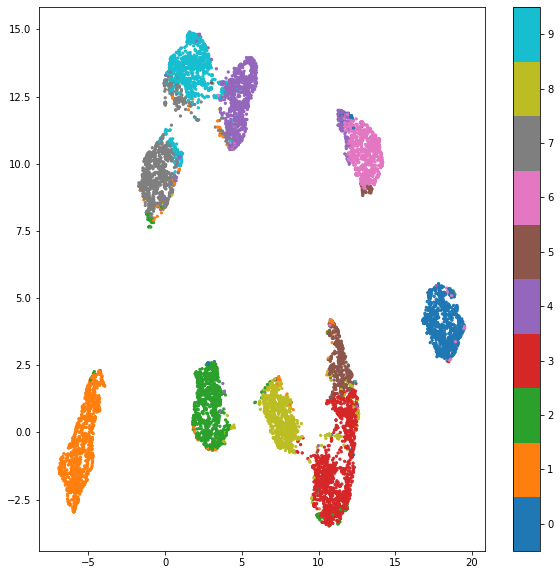

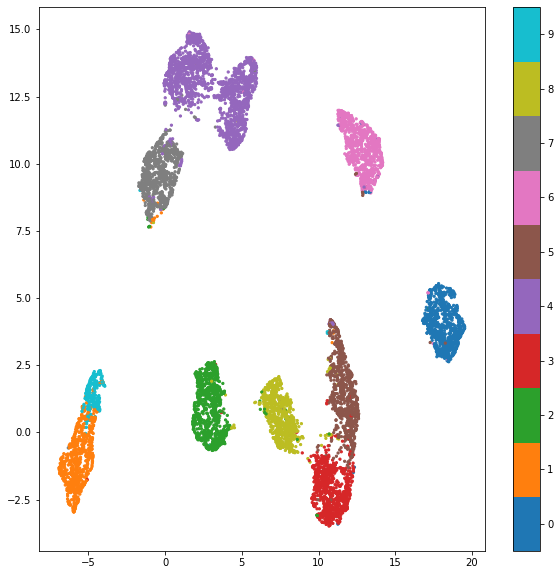

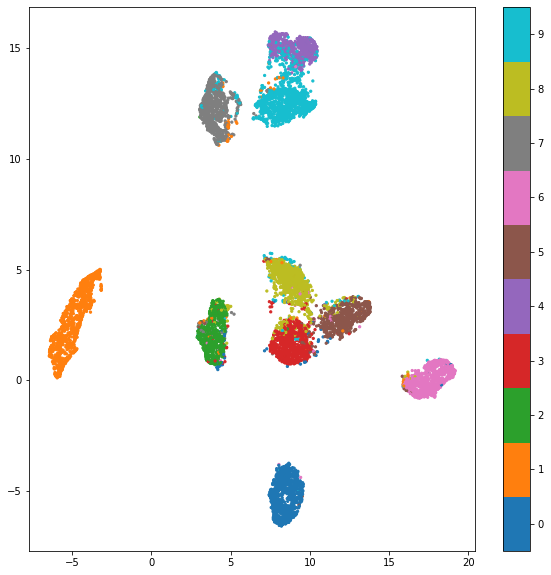

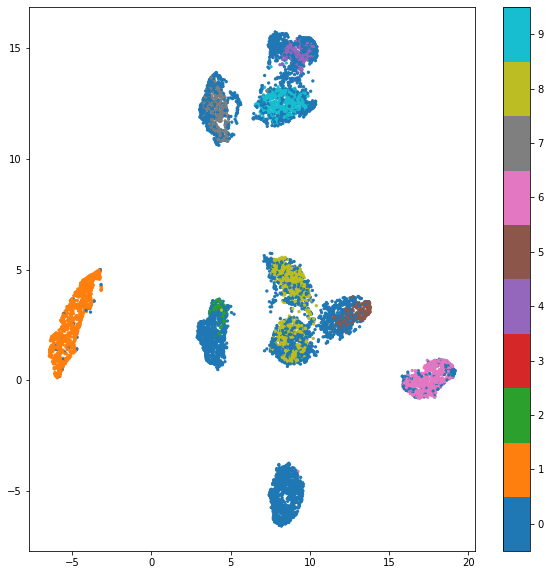

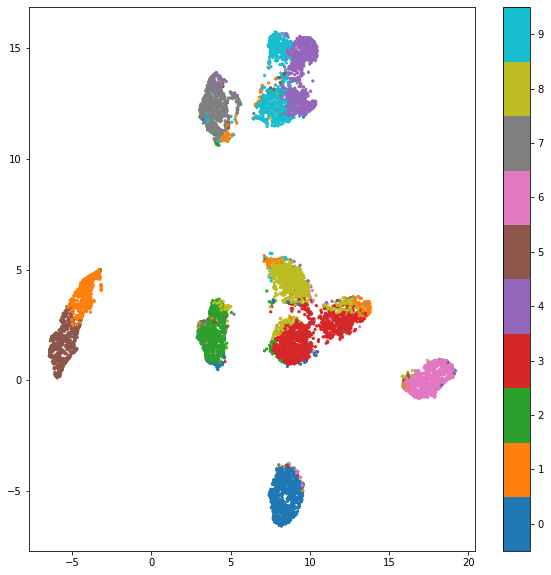

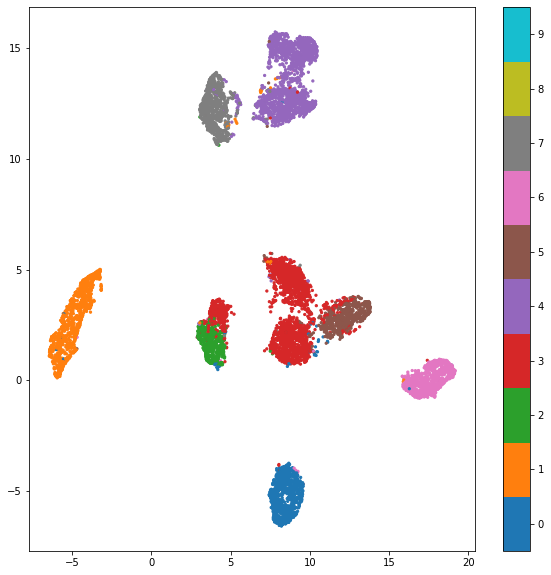

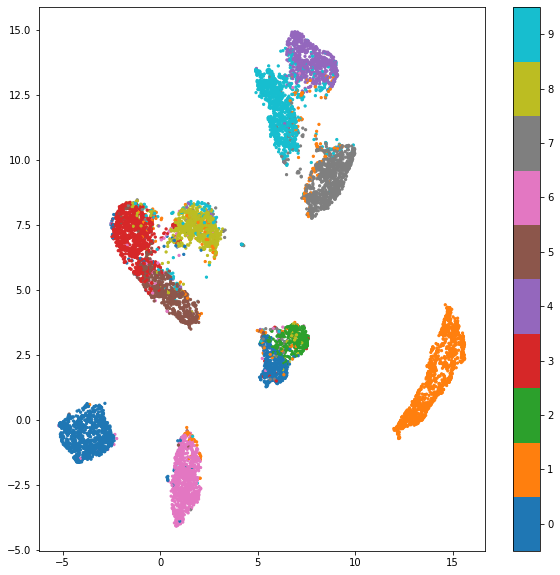

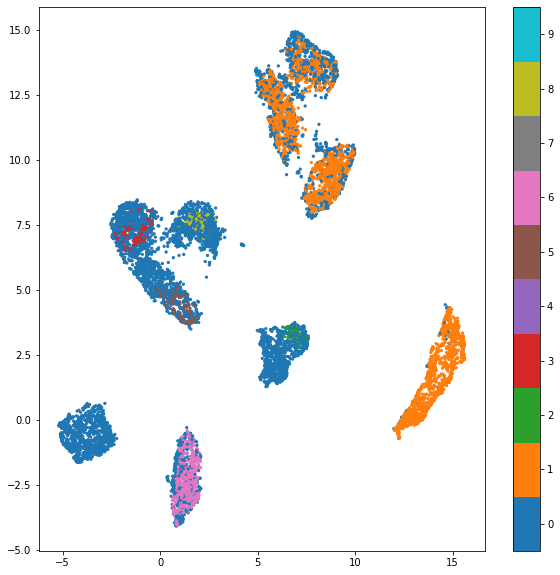

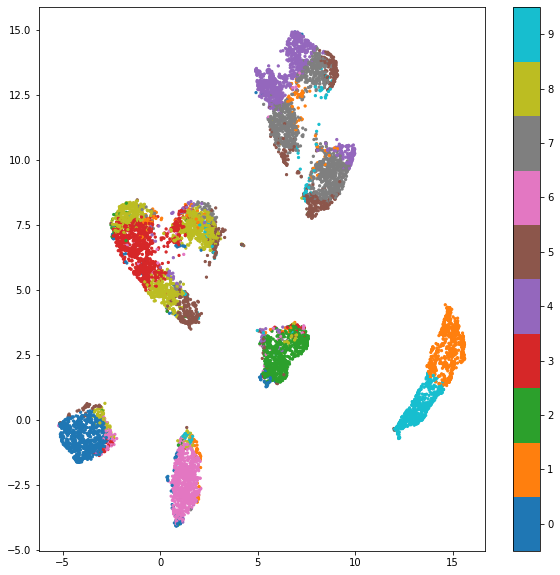

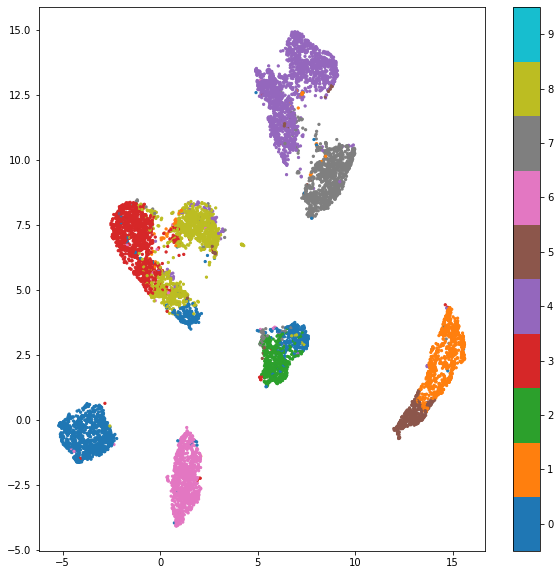

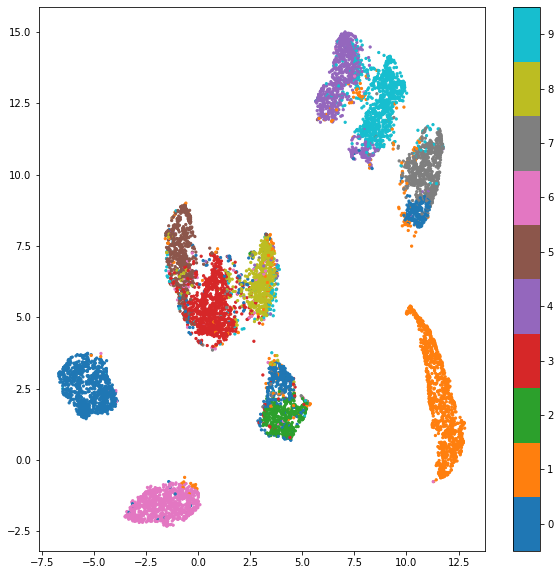

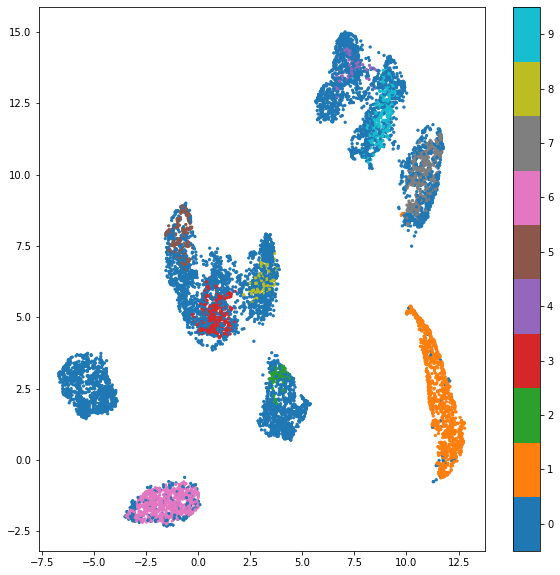

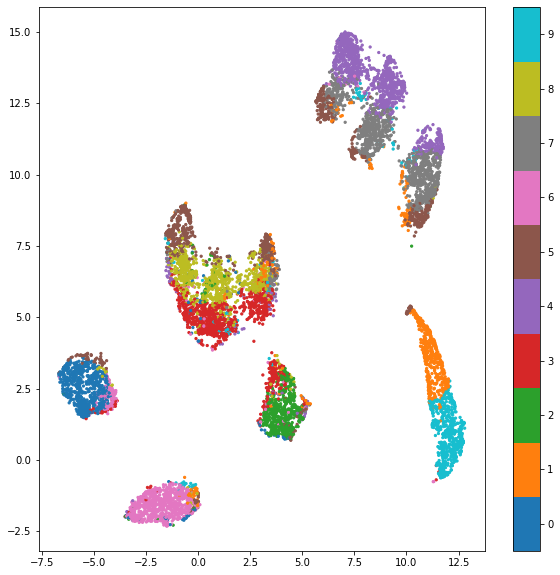

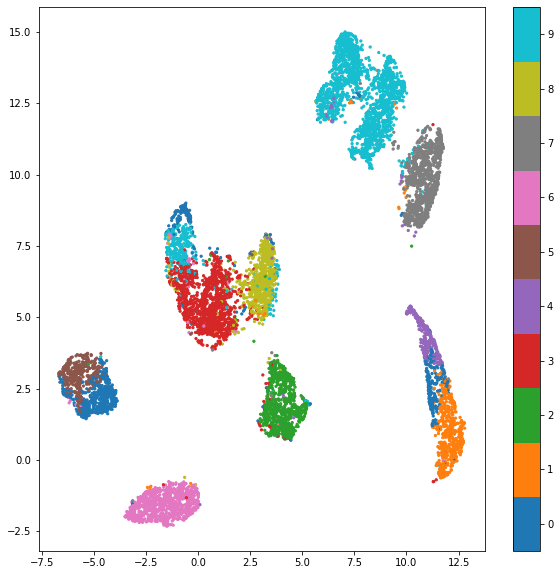

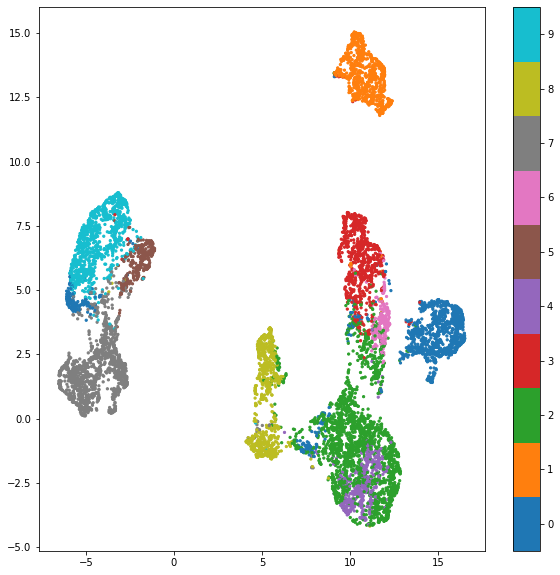

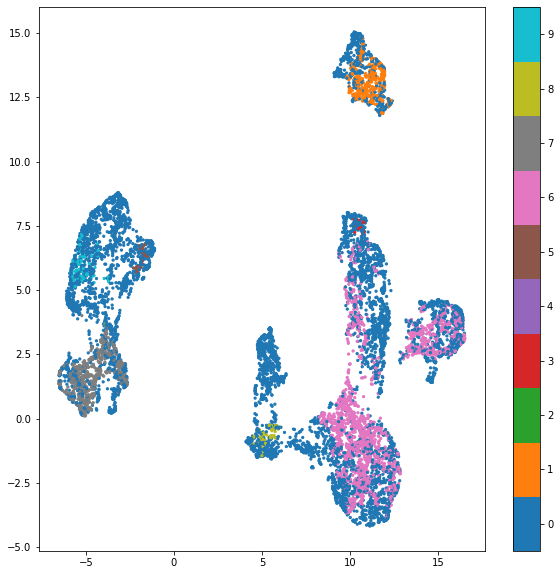

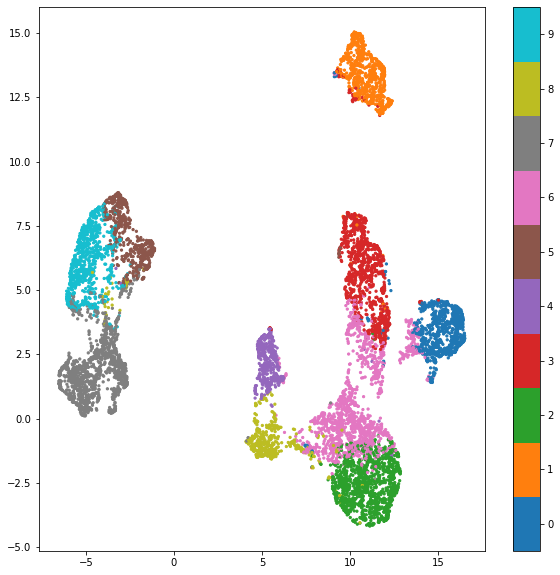

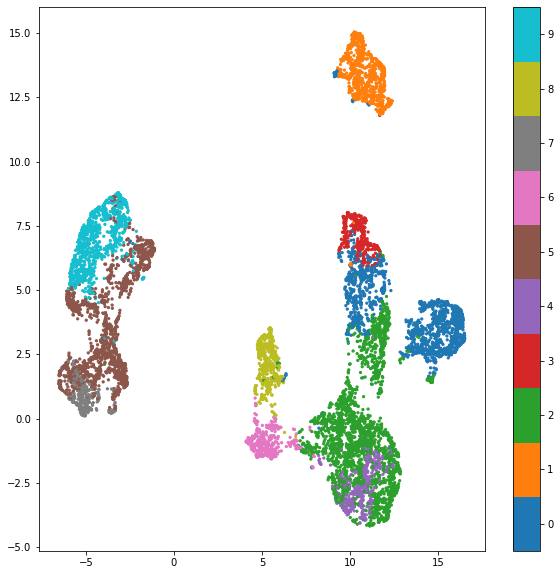

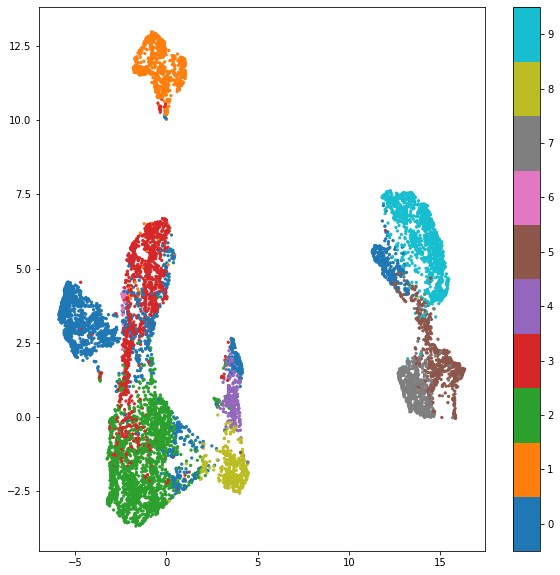

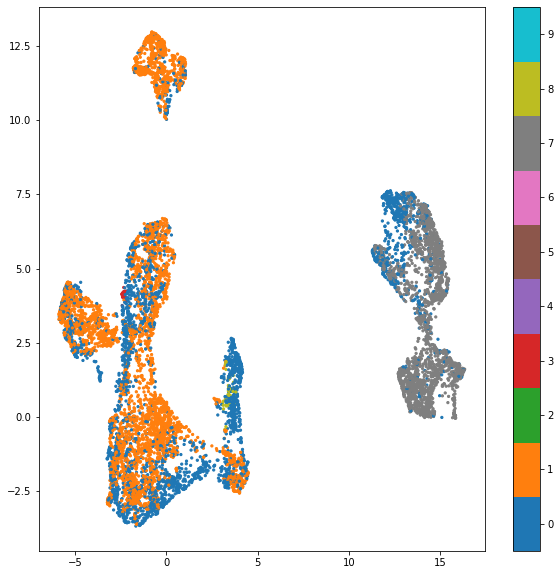

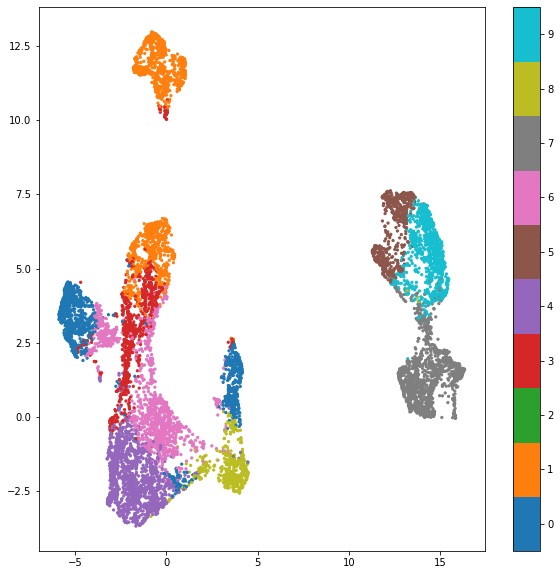

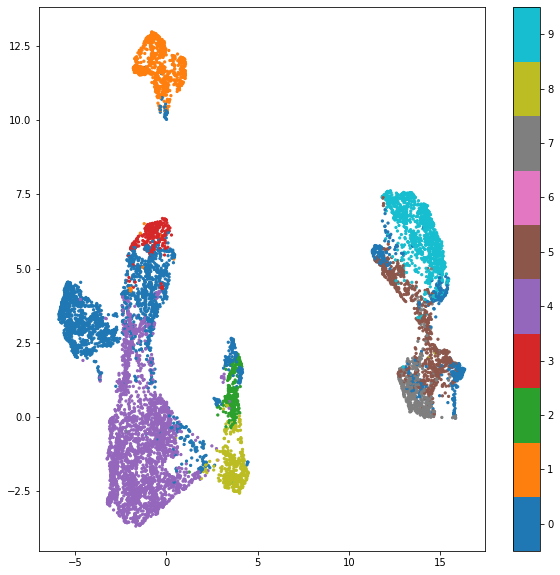

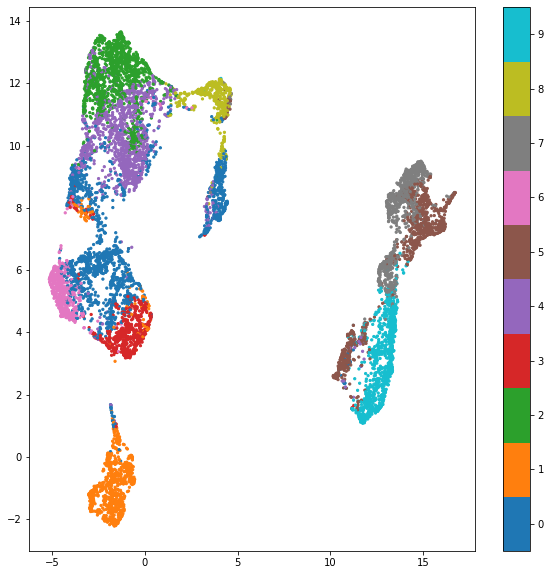

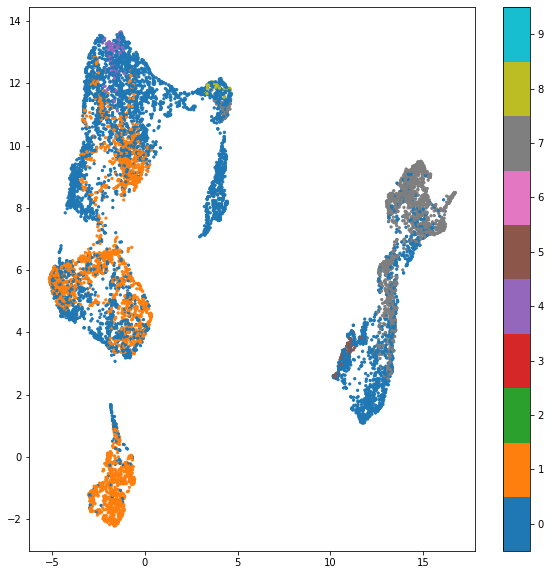

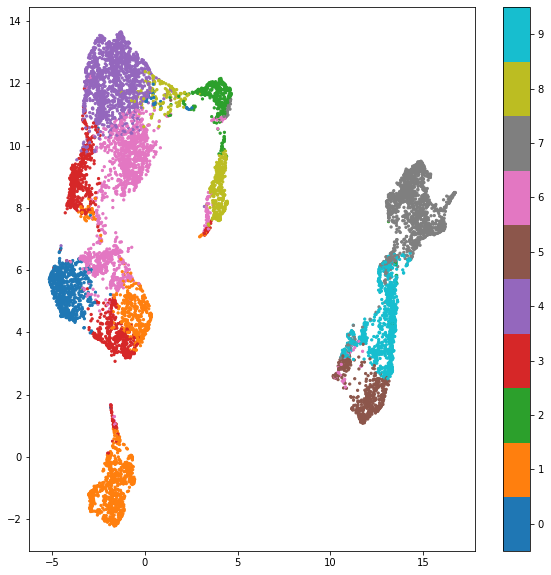

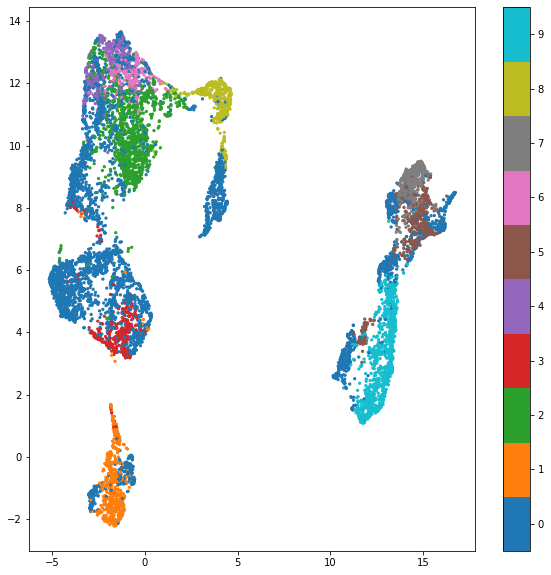

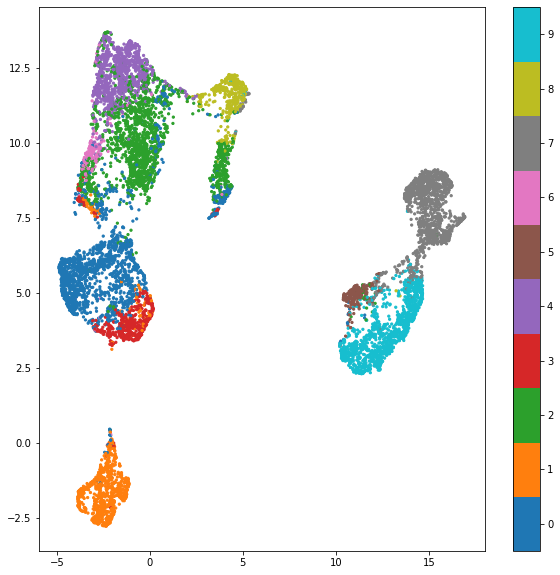

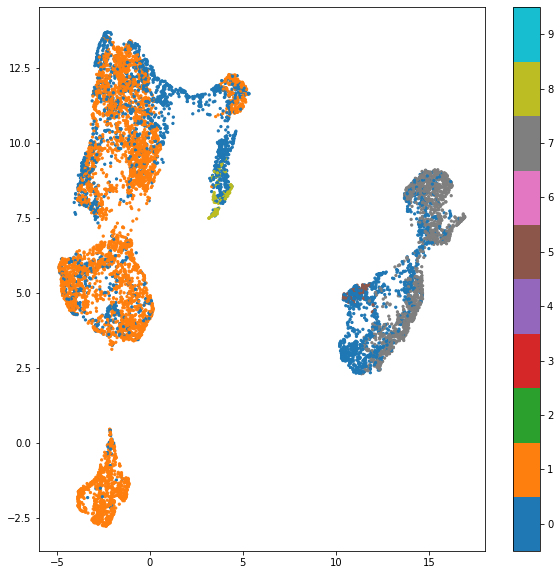

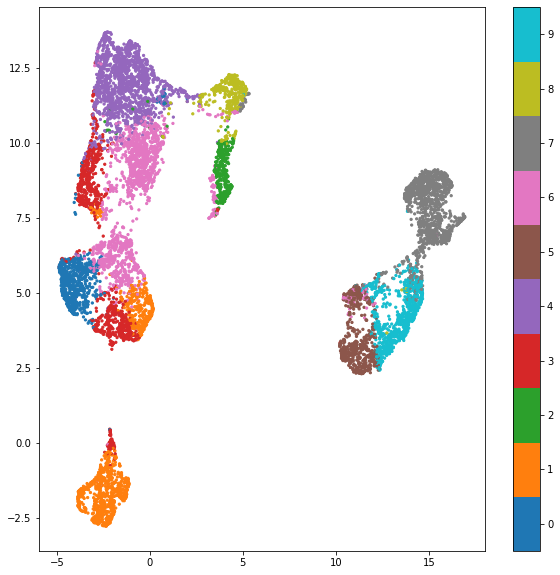

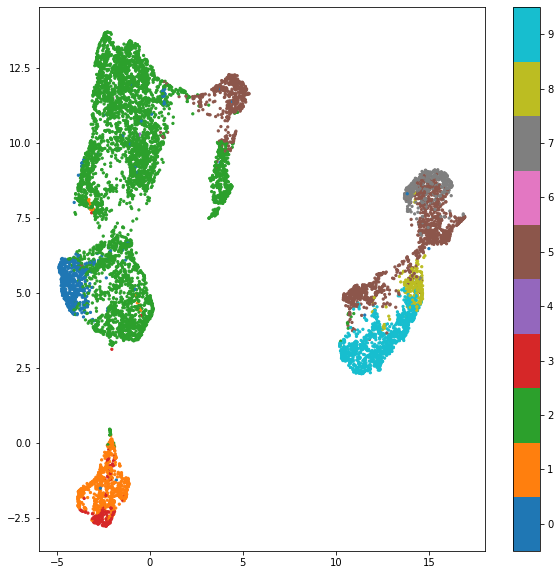

In [19]:
DATASETS = ['mnist_5', 'mnist_10', 'mnist_20', 'mnist_30', 
            'fmnist_5', 'fmnist_10', 'fmnist_20', 'fmnist_30']
MODELS = ['GDT', 'HDBSCAN', 'KMeans', 'QuickshiftPP']

reducer = umap.UMAP(random_state=0, n_jobs=1)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=0.1,wspace=0.1)
for dataset in DATASETS:
    X,Y_true = DataLoader.load(dataset)
    embedding = reducer.fit_transform(X)
    for model in MODELS:
        if model != 'KMeans':
            param = param_dict[model][dataset]
        if model == 'GDT':
            Y_pred = DGSFC.fit(X, K_d=param['K_d'], K_s=param['K_s'], alpha=param['alpha'], 
                                   epsilon=0, plot=False, scale=True)
        elif model == 'HDBSCAN':
            clusterer = hdbscan.HDBSCAN(min_cluster_size=param['min_cluster_size'], 
                                        min_samples=param['min_samples'],
                                        cluster_selection_epsilon=param['cluster_selection_epsilon'])
            clusterer.fit(X)
            Y_pred = clusterer.labels_
        elif model == 'KMeans':
            kmeans = KMeans(n_clusters=10, random_state=5).fit(X)
            Y_pred=kmeans.predict(X)
        elif model == 'QuickshiftPP':
            quickshiftpp = QuickshiftPP(k=param['k'],beta=param['beta'])
            quickshiftpp.fit([X[i] for i in range(X.shape[0])])
            Y_pred = quickshiftpp.memberships
        Y_pred, Y_true = matchY(Y_pred, Y_true)
        # Save Y_pred
        np.save(osp.join('umap_npy', dataset + '_' + model + '.npy'), Y_pred)
        # visualize
        plt.figure(figsize=(10, 10))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=Y_pred, cmap='tab10', s=5)
        plt.clim(0, 10)
        plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
        plt.savefig(osp.join('umap_results', dataset + '_' + model + '.jpg'))

In [60]:
reducer = umap.UMAP(random_state=0, n_jobs=1)
for dataset in DATASETS:
    X,Y_true = DataLoader.load(dataset)
    embedding = reducer.fit_transform(X)
    np.save(osp.join('umap_npy', dataset + '_embedding.npy'), embedding)
#     plt.figure(figsize=(10, 10))
#     plt.scatter(embedding[:, 0], embedding[:, 1], c=Y_true, cmap='tab10', s=5)
#     plt.clim(0, 10)
#     plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
#     np.save(osp.join('umap_npy', dataset + '_groundtruth.npy'), Y_true)

<Figure size 432x288 with 0 Axes>

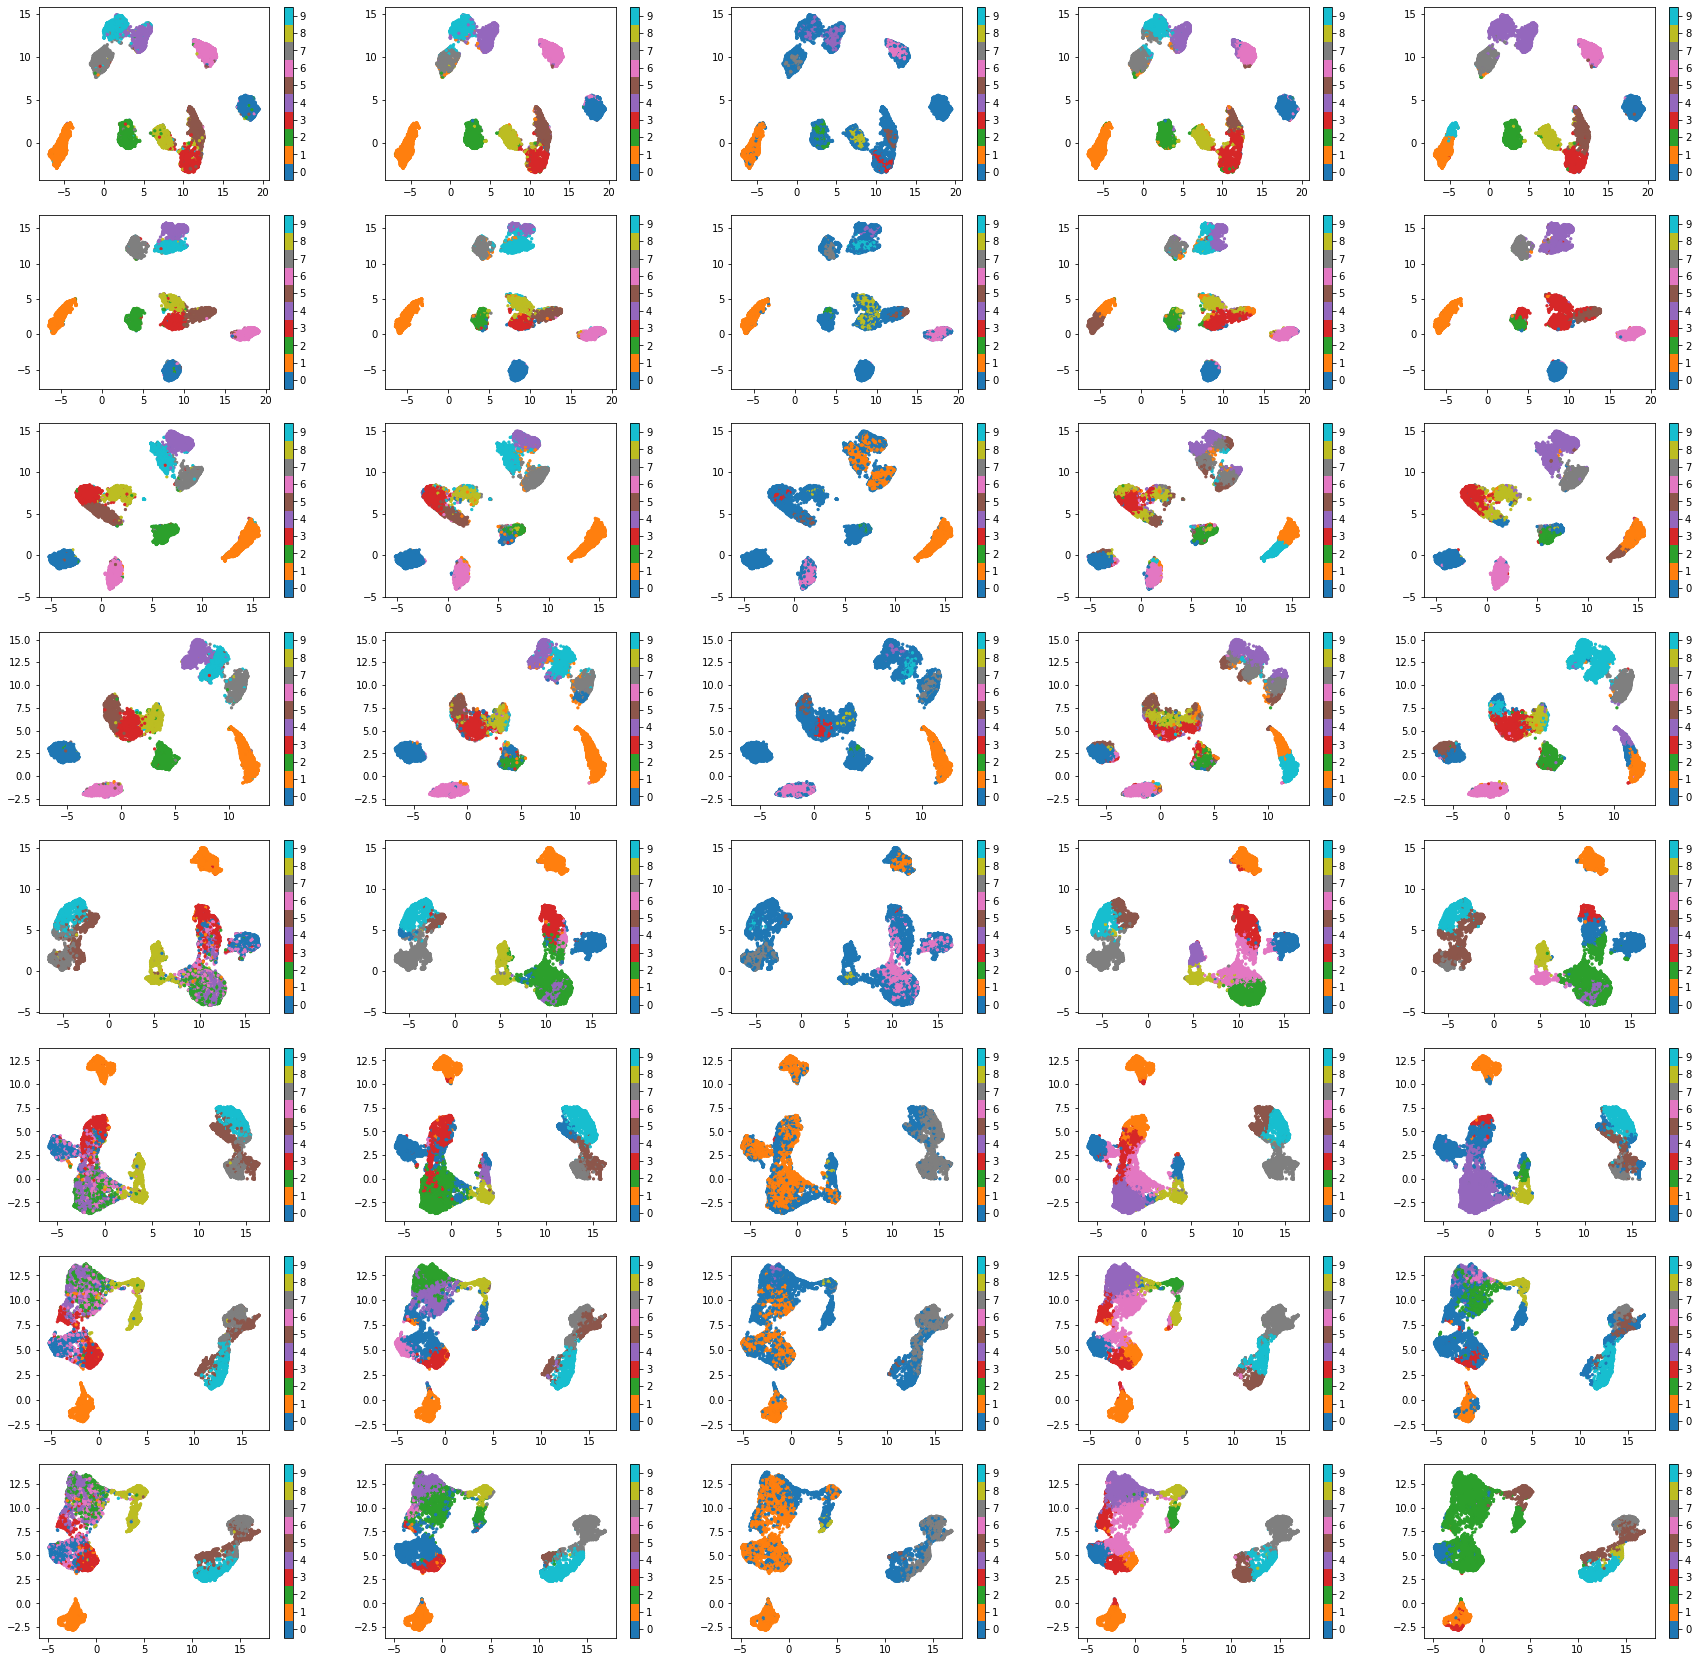

In [67]:
DATASETS = ['mnist_5', 'mnist_10', 'mnist_20', 'mnist_30', 
            'fmnist_5', 'fmnist_10', 'fmnist_20', 'fmnist_30']
MODELS = ['groundtruth', 'GDT', 'HDBSCAN', 'KMeans', 'QuickshiftPP']

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=0.05,wspace=0.05)

fig, subs = plt.subplots(nrows=8, ncols=5, figsize=(30, 30))
from matplotlib import colors, cm
cmap = cm.get_cmap('tab10')
norm = colors.Normalize(0, 9)
for i, dataset in enumerate(DATASETS):
    embedding = np.load(osp.join('umap_npy', dataset + '_embedding.npy'))
    for j, model in enumerate(MODELS):
        Y_pred = np.load(osp.join('umap_npy', dataset + '_' + model + '.npy'))
        im = subs[i, j].scatter(embedding[:, 0], embedding[:, 1], c=Y_pred, cmap=cmap, norm=norm, s=5)
        fig.colorbar(im, ax=subs[i, j],boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.savefig('mnist.pdf')